# Importing Libraries and Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
file_path = '/kaggle/input/data-science-salaries-2023/Latest_Data_Science_Salaries.csv'

/kaggle/input/data-science-salaries-2023/Latest_Data_Science_Salaries.csv


In [2]:
data = pd.read_csv('/kaggle/input/data-science-salaries-2023/Latest_Data_Science_Salaries.csv')
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


# Importing Some More Libraries

In [3]:
# Import country code libraries
!pip install pycountry -q
import pycountry

#Install plot library
import plotly.io as pio
pio.renderers.default='notebook'

# Checking Missing Values in Dataset

In [4]:
data.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

# Some Unique Values

In [5]:
data.nunique()

Job Title              111
Employment Type          4
Experience Level         4
Expertise Level          4
Salary                1071
Salary Currency         22
Company Location        71
Salary in USD         1315
Employee Residence      83
Company Size             3
Year                     4
dtype: int64

# Shape

In [6]:
data.shape

(3300, 11)

# Renaming Some Feature to Get Better Picture

In [7]:
data['Experience Level'] = data['Experience Level'].replace({
    'SE': 'Senior',
    'EN': 'Entry',
    'EX': 'Executive',
    'MI': 'Mid',
})

data['Employment Type'] = data['Employment Type'].replace({
    'FL': 'Freelance',
    'CT': 'Contract',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['Company Size'] = data['Company Size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})


In [8]:
print('There are',data['Job Title'].nunique(),'different type of jobs available')
print(80*'*')
print('This are the jobs',data['Job Title'].unique())

There are 111 different type of jobs available
********************************************************************************
This are the jobs ['Data Engineer' 'Data Scientist' 'Analytics Engineer'
 'Business Intelligence Developer' 'Machine Learning Engineer'
 'Data Analyst' 'Decision Scientist' 'Machine Learning Software Engineer'
 'BI Developer' 'Machine Learning Scientist' 'BI Analyst' 'Data Manager'
 'Business Intelligence Engineer' 'ML Engineer' 'Data Science Manager'
 'AI Programmer' 'Applied Scientist' 'Data Analytics Manager'
 'Research Engineer' 'Research Scientist' 'Data Lead' 'Data Strategist'
 'Data Quality Analyst' 'Data Architect' 'AI Architect'
 'Computer Vision Engineer' 'Business Intelligence Analyst'
 'Principal Data Scientist' 'Staff Machine Learning Engineer'
 'Staff Data Scientist' 'Consultant Data Engineer'
 'Machine Learning Specialist' 'Head of Data' 'Data Quality Engineer'
 'Research Analyst' 'Principal Machine Learning Engineer'
 'Deep Learning Engineer' '

In [9]:
job_df = pd.DataFrame(data['Job Title'].value_counts().reset_index())
job_df.rename(columns = {'index':'Role','Job Title':'frequency'}, inplace = True)
job_df

,Role,frequency
0,Data Engineer,702
1,Data Scientist,635
2,Data Analyst,459
3,Machine Learning Engineer,300
4,Analytics Engineer,132
...,...,...
106,Deep Learning Researcher,1
107,Analytics Engineering Manager,1
108,AWS Data Architect,1
109,BI Data Engineer,1


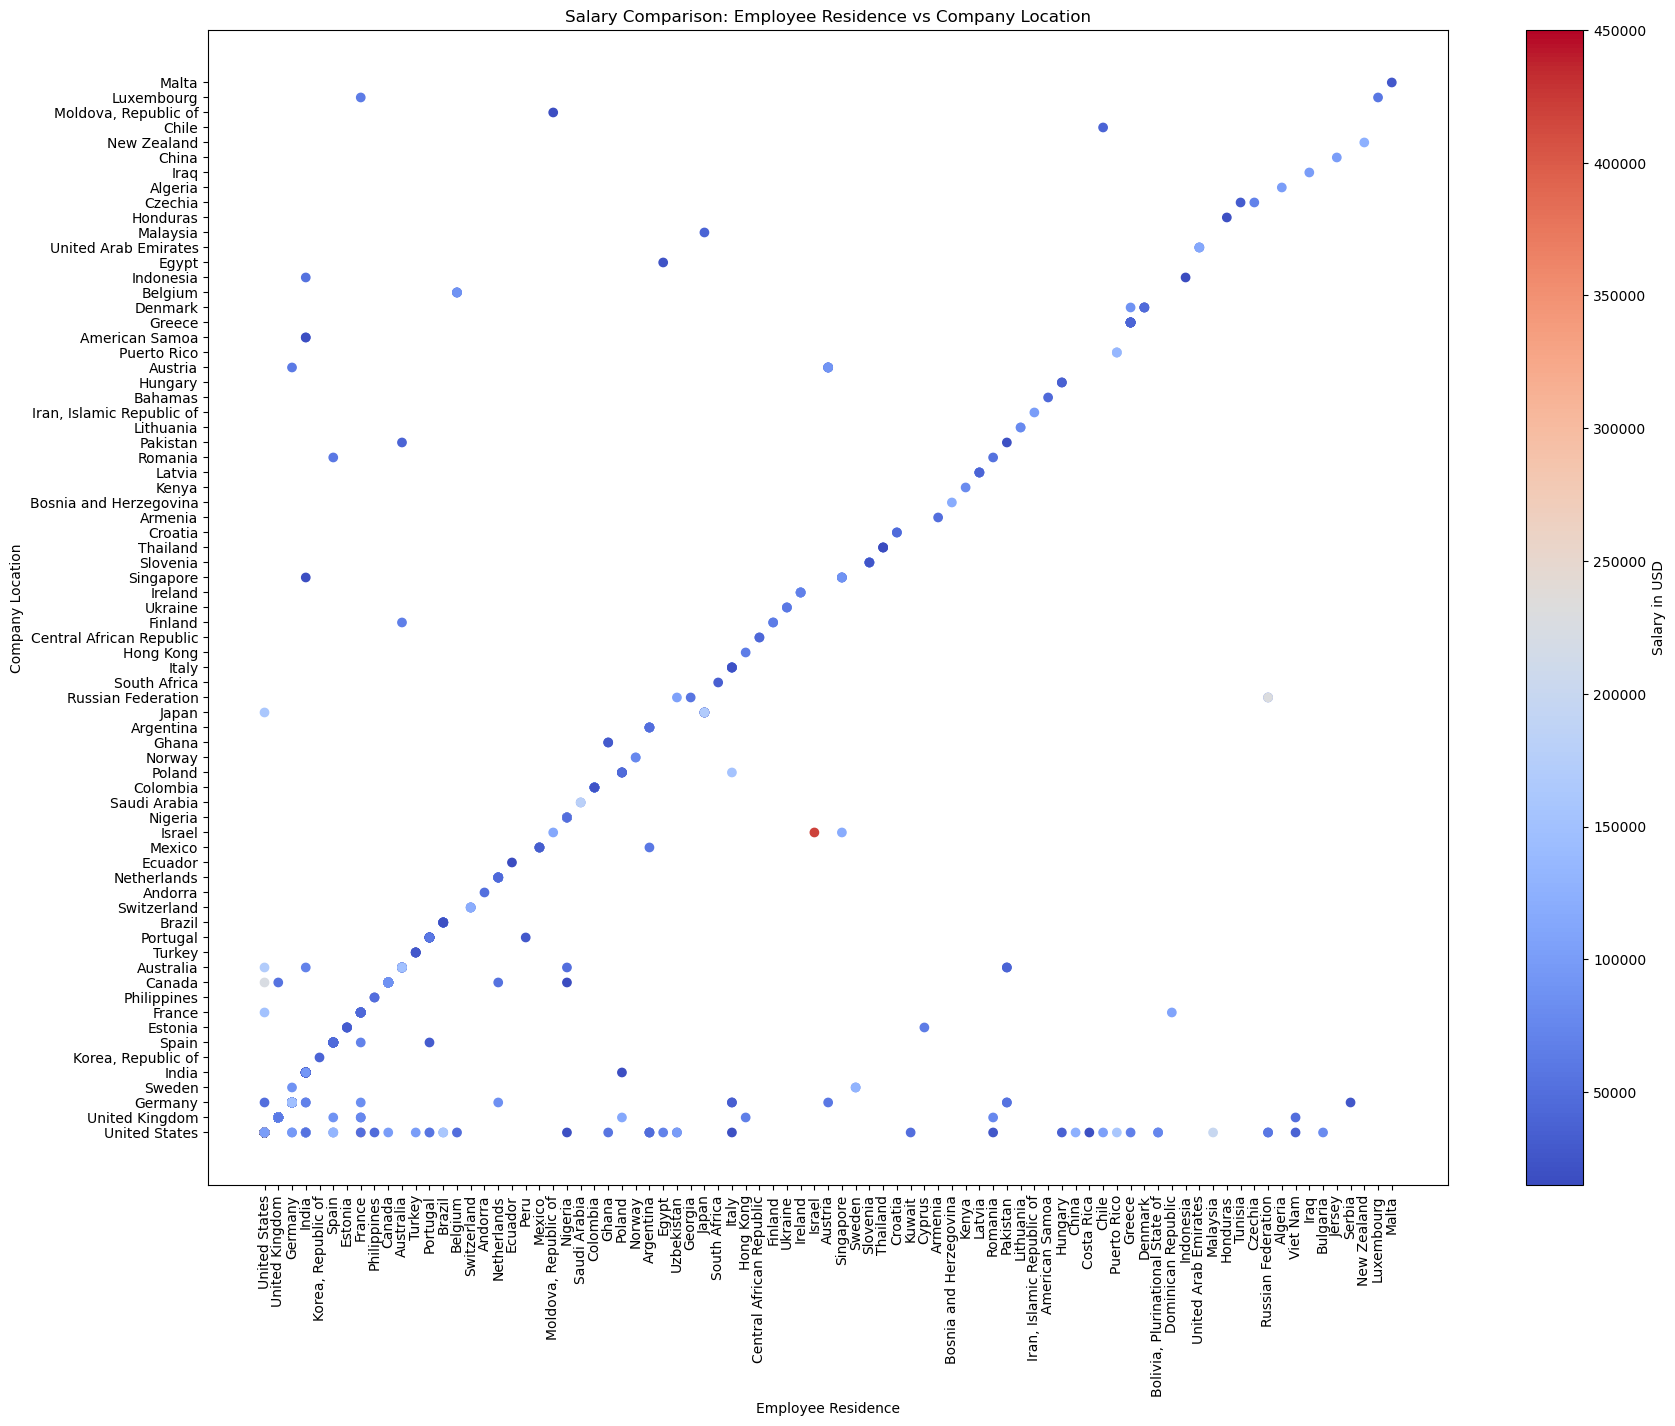

In [10]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(20, 15))
plt.scatter(data['Employee Residence'], data['Company Location'], c=data['Salary in USD'], cmap='coolwarm')
plt.colorbar(label='Salary in USD')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.title('Salary Comparison: Employee Residence vs Company Location')
plt.xticks(rotation=90)
plt.show()


# Distribution across different employment types

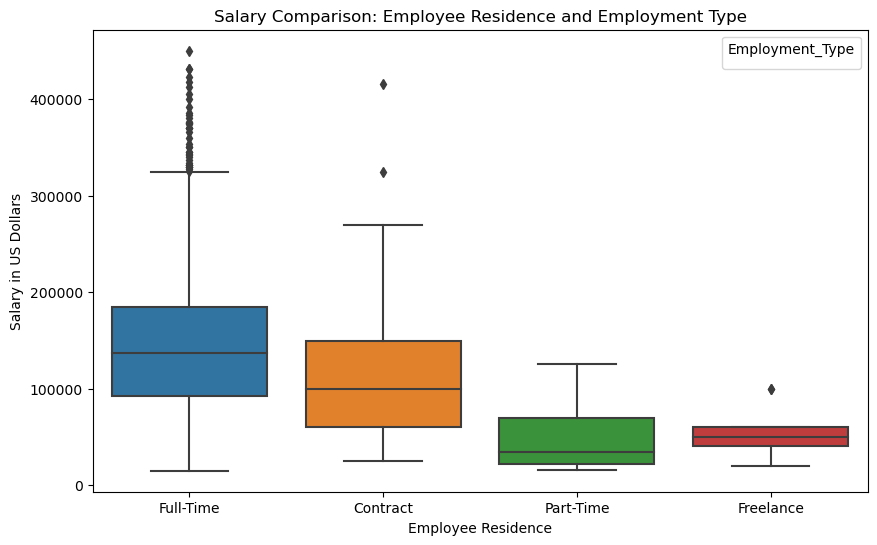

In [11]:
import seaborn as sns
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Employment Type', y='Salary in USD')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in US Dollars')
plt.title('Salary Comparison: Employee Residence and Employment Type')
plt.legend(title='Employment_Type')
plt.show()

NameError: name 'stats' is not defined

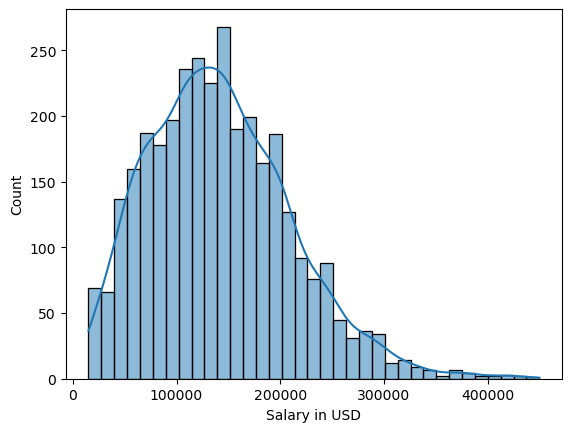

In [13]:
import seaborn as sns
# Create a list of the columns to analyze
columns = ['Salary in USD']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of {}'.format(col),fontsize=20)

    plt.show()

# Ranking with respect to Demand

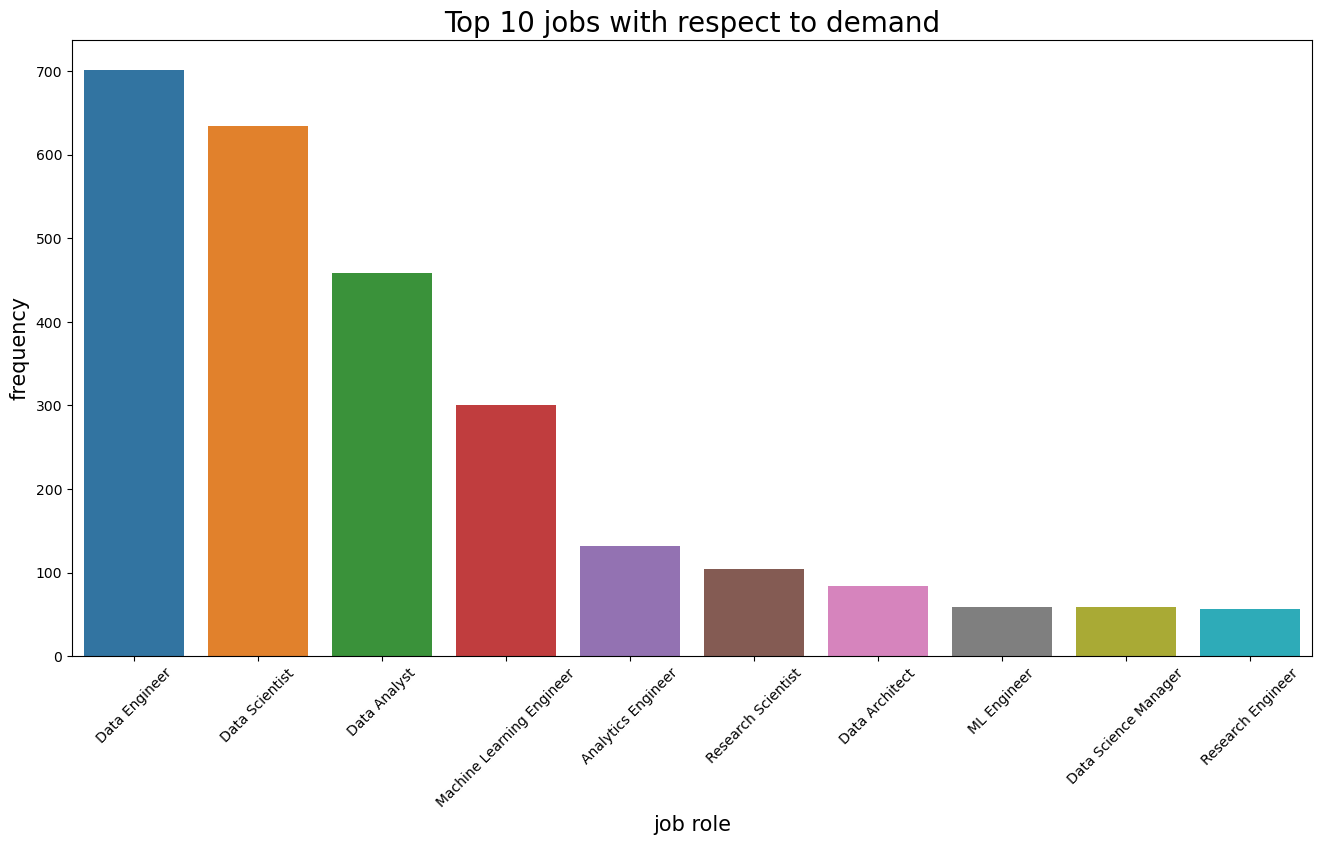

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.title("Top 10 jobs with respect to demand",fontsize=20)
sns.barplot(x=job_df["Role"][:10],y=job_df['frequency'][:10])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("job role",fontsize=15)
plt.xticks(rotation=45)
plt.show()


# Grouping the Job Titles

In [16]:
import pandas as pd

# Create a DataFrame 'df' with a 'job_title' column
data = {'job_title': ['Data Engineer', 'Data Scientist', 'Machine Learning Engineer', 'Data Analyst']}
df = pd.DataFrame(data)

# Define the function 'assign_broader_category'
def assign_broader_category(job_title):
    # Categories mapping
    data_engineering = ["Data Engineer", "Data Analyst"]
    data_scientist = ["Data Scientist"]
    machine_learning = ["Machine Learning Engineer"]
    
    # Assign broader categories
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

# Display the updated DataFrame
print(df)


                   job_title      job_category
0              Data Engineer  Data Engineering
1             Data Scientist      Data Science
2  Machine Learning Engineer  Machine Learning
3               Data Analyst  Data Engineering


In [19]:
job_category_df = pd.DataFrame(df['job_category'].value_counts().reset_index())
job_category_df.rename(columns = {'index':'category','job_category':'frequency'}, inplace = True)

In [20]:
job_category_df

,category,frequency
0,Data Engineering,2
1,Data Science,1
2,Machine Learning,1


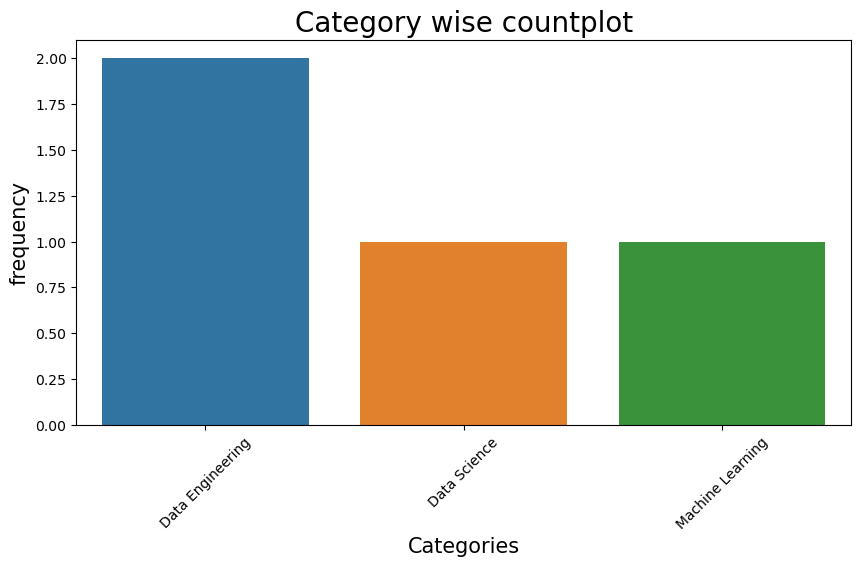

In [21]:
plt.figure(figsize=(10,5))
plt.title("Category wise countplot",fontsize=20)
sns.barplot(x=job_category_df["category"],y=job_category_df['frequency'])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("Categories",fontsize=15)
plt.xticks(rotation=45)
plt.show()

# Thanks You to have a glance! 

 # Your sugesstions and opinions always be welcomed!